<a href="https://colab.research.google.com/github/Azharpat/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-UNSUPERVISED-LERANING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies And Tv Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    -  AZHAR PATEL(Individual)


# **Project Summary -**

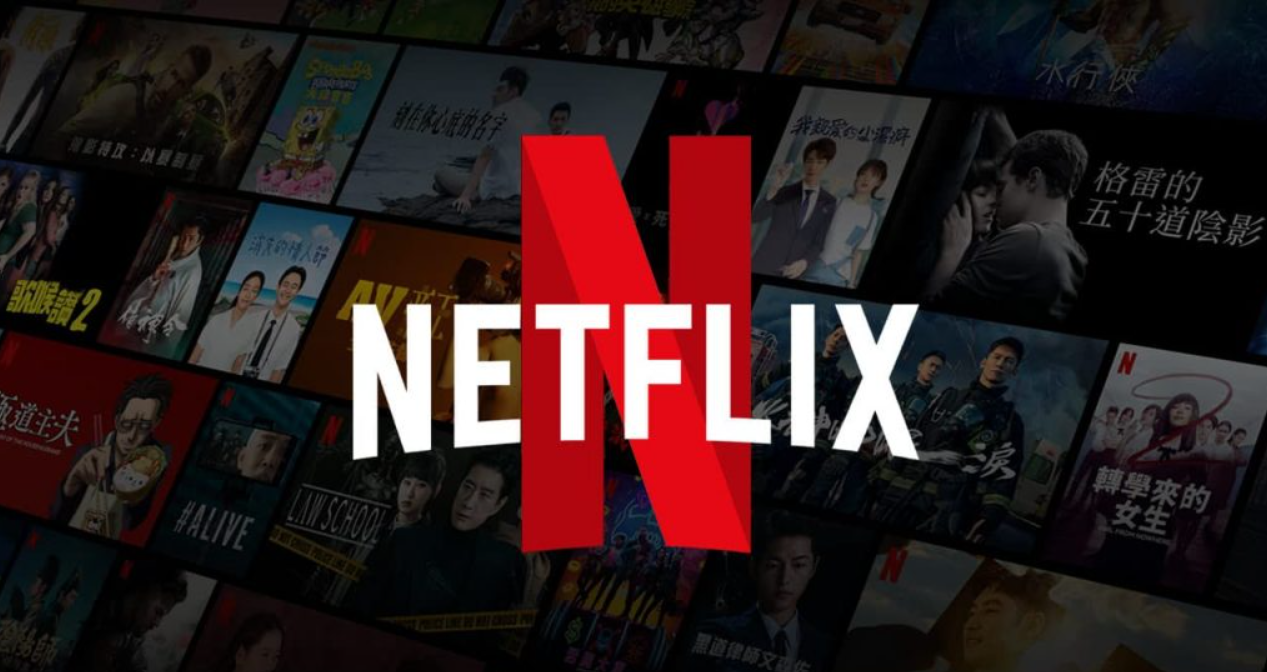

Los Gatos, California serves as the home office for Netflix, Inc., an American media company. Reed Hastings and Marc Randolph founded the Netflix brand, an over-the-top subscription video on-demand service, in Scotts Valley, California, in 1997. It offers both first-party content that has been licenced from other distributors as well as original films and television programmes that the firm has created or purchased. As of January 2023, there were around 230 million Netflix customers worldwide.

Customers may find it difficult to find the films and TV shows they're looking for on Netflix, one of the most well-known streaming services. Comparable films and TV shows could be grouped together according to genre, release year, rating, etc. to overcome this problem. This project's objective is to employ unsupervised machine learning techniques to cluster similar films and TV episodes and provide users-specific recommendations.

Approach:

The dataset had 12 attributes and around 7787 records. To get started, we mounted the drive, imported the required libraries, and stored the data in variables. We separated the date added into days, months, and years as the next stage in the data wrangling process.

The next step was data analysis and visualisation, where we looked at our data distribution using various plots and attempted to draw useful conclusions from the dataset.

We performed feature engineering and data pre-processing to prepare the data for model training. We dealt with the null values by appropriately replacing them.

We choose to cluster the data based on the attributes director, cast, country, genre, rating, and description during the preprocessing of the textual data. The stopwords and punctuation were all eliminated after choosing the attributes for clustering. We used SnowballStemmer to conduct stemming on these properties after changing their case to lowercase.

These attributes values underwent tokenization, preprocessing, and vectorization using TFIDF vectorizer. The total number of characteristics we produced through TFIDF vectorization was 10000.

To lessen the dimensionality, we employed Principal Component Analysis (PCA). With the use of the scree plot, we saw that approximately 5000 components could account for more than 90% of the variation; as a result, the number of components was limited to 5000.

The ideal number of clusters was found to be 7, which was achieved using the K-Means Clustering technique. This was obtained using the Elbow technique and Silhouette score analysis.

Then, clusters were made using the Agglomerative clustering technique, and it was found that the optimal number of clusters was 6. To get this, a dendrogram was visualised.

A content-based recommender system was built using the similarity matrix that was discovered through the usage of cosine similarity. This recommender system will offer the customer 10 recommendations based on the type of show they watched..

Overall, when working with this particular dataset, we combined data processing, visualisation, and machine learning methods. Despite being a challenging task, we were able to create clusters and a content-based recommender system utilising the right approach.

# **GitHub Link -**

https://github.com/Azharpat/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-UNSUPERVISED-LERANING/tree/main

# **Problem Statement**


This dataset consists of TV shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this information with additional external datasets such as IMDB ratings and rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

**Exploratory Data Analysis.**

1.We understand what type of content is available in different countries.

2.Is Netflix increasingly focusing on TV rather than movies in recent years?

3.Clustering similar content by matching text-based features.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [112]:
import numpy as np  # For numerical computing
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For enhanced data visualization
import missingno as msno  # For visualizing missing data patterns
import matplotlib.cm as cm  # For colormap management

from os import path  # For pathname manipulations
from PIL import Image  # For image manipulation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  # For creating word clouds

# For NLP (Natural Language Processing)
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# For clustering and evaluation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')  # To suppress warning messages


### Dataset Loading

In [113]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING unsupervise /Data NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [115]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [116]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [117]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [118]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [119]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [120]:
# Missing Values/Null Values Count
null_value =df.isnull().sum()
print(null_value)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [121]:
# Visualizing the missing values

def visualize_missing_values(df):
    # Calculate the missing value counts
    missing_counts = df.isnull().sum()

    # Filter columns with missing values
    missing_columns = [col for col, count in missing_counts.items() if count > 0]
    missing_values = [count for count in missing_counts if count > 0]

    # Create a bar plot of missing values
    plt.figure(figsize=(10, 6))
    plt.bar(missing_columns, missing_values)
    plt.xlabel('Columns')
    plt.ylabel('Missing Value Count')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=90)
    plt.show()


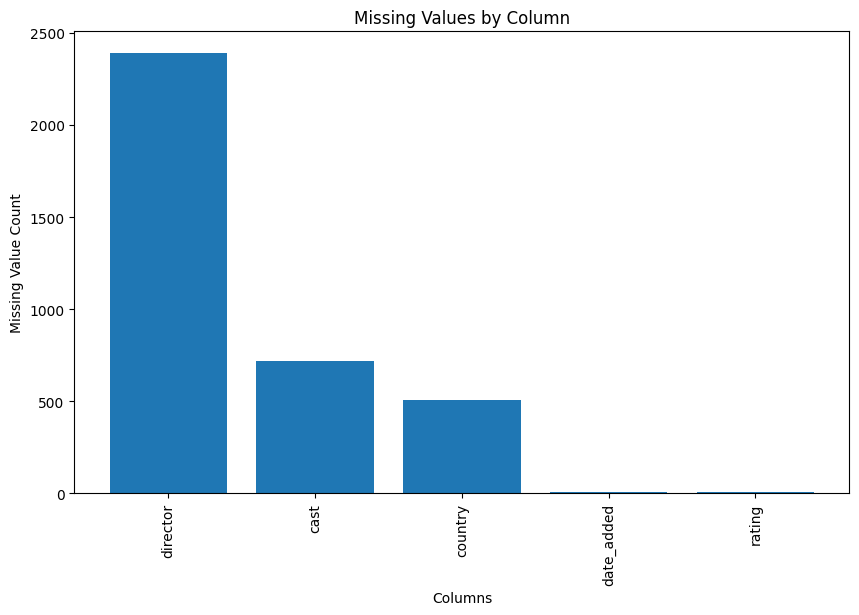

In [122]:
visualize_missing_values(df)

### What did you know about your dataset?

Here the blue bar shows that null values present in dataset so it shows that most number of null values are present in director followed by cast,country,date_added and rating.

## ***2. Understanding Your Variables***

In [123]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Variables Description

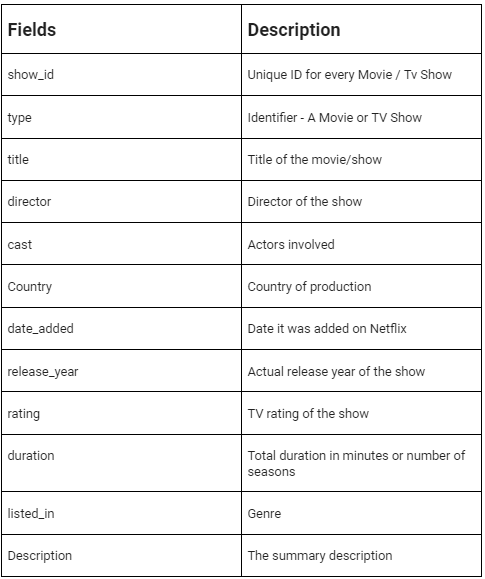Answer Here

### Check Unique Values for each variable.

In [124]:
# Check Unique Values for each variable.
total_unique_values = df.nunique().sum()
print("Total unique values across all variables:", total_unique_values)


Total unique values across all variables: 37266


## 3. ***Data Wrangling***

### Data Wrangling Code

##Fill null values
Here in date_added there are only 10 missing values so we can simply drop them.

As we don't able to fill wrong director,cast,country for unknown film we
simply fill unknown in place of null values in director column.
At last in place of rating we can fill null values by using mode.


In [125]:
df[['cast','director','country']]=df[['cast','director','country']].fillna('Unknown')

In [126]:
df.dropna(axis=0,inplace=True)

In [127]:
# check does null values are totally filled or not
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [128]:
# The duration is the variable which is string type so convert first part of duration variable to int
df['duration']=df['duration'].apply(lambda x: int(x.split()[0]))

In [129]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


##Type casting.

In [130]:
# The values are in season
df[df['type']=='TV Show'].duration.unique()

array([ 4,  1,  2,  3,  5,  9,  8,  6, 11,  7, 13, 12, 10, 16, 15])

In [131]:
# The values are in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101, 113, 114, 130,  94,
       140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,  96,
       126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,  29,
       142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57, 150,
       133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,  38,
        25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,  42,
        79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,  48,
       139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165, 166,
       138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,  14,
       177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200, 169,
        27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13, 214,
        17, 173, 192, 209, 187,  41, 182, 224,  37, 233, 189, 15

In [132]:
#data type of duration
df.duration.dtype

dtype('int64')

##Typecast date_added string to datetime.

In [133]:
# from string to datetime
df['date_added']=pd.to_datetime(df['date_added'])

In [134]:
df['date_added'].dtype

dtype('<M8[ns]')

##Rating

In [135]:
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [136]:
# We know the rating is designed for spefic group of persons so we can also convert it into age wise such as
rating_age = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
df['age_group'] = df['rating'].replace(rating_age)

In [137]:
df['age_group'].head()

0    Adults
1    Adults
2    Adults
3     Teens
4     Teens
Name: age_group, dtype: object

### What all manipulations have you done and insights you found?

Insights that can be derived from these manipulations:

The data was cleaned by handling missing values and dropping rows with remaining missing values.

The 'duration' column was transformed into an integer format, allowing for numerical analysis.

The unique values of 'duration' for 'TV Show' and 'Movie' indicate that TV shows have season-based duration while movies have duration in minutes.

The 'rating' distribution shows the frequency of different rating categories.
The 'rating' values were mapped to age groups, providing a categorical representation for different target audiences.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Countplot to display the rating count')

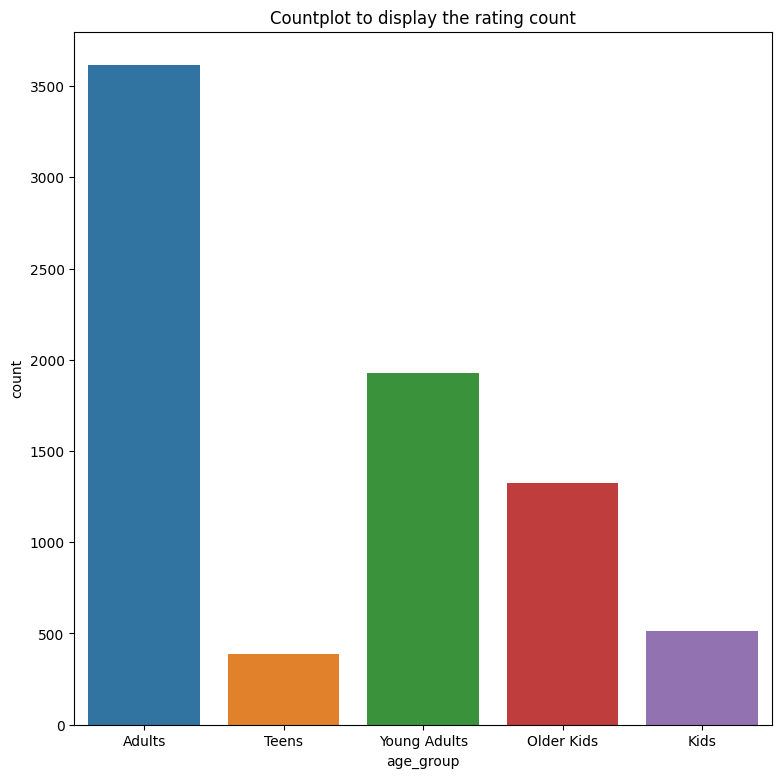

In [138]:
# Chart - 1 visualization code
# As we modified the rating column so we have to display it in view of countplot
plt.figure(figsize=(9,9))
sns.countplot(x='age_group',data=df)
plt.title('Countplot to display the rating count')

##### 1. Why did you pick the specific chart?

Here countplot is used because it display the rating bar and its count.

##### 2. What is/are the insight(s) found from the chart?

Adult content is in big quntity as compaired to other content.

#### Chart - 2

In [139]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'age_group'],
      dtype='object')

Text(0.5, 1.0, 'countplot to display the count of type')

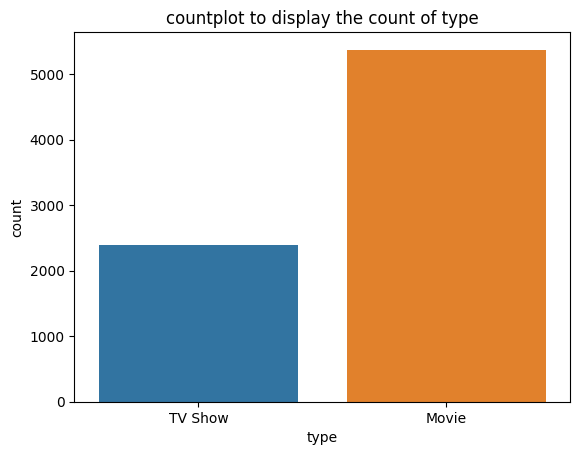

In [140]:
# Chart - 2 visualization code
sns.countplot(x=df['type'])
plt.title('countplot to display the count of type')

Text(0.5, 1.0, 'The pai plot for display the count of Show')

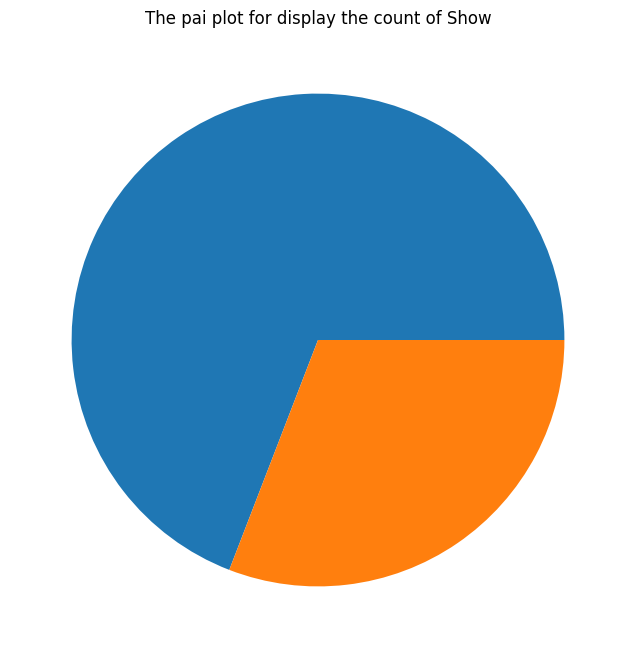

In [141]:
# count of Type of show
plt.figure(figsize=(9,8))
plt.pie(df.type.value_counts())
plt.title('The pai plot for display the count of Show')

##### 1. Why did you pick the specific chart?

Here as we can see the Movies are more in count as compaired to TV show.

#### Chart - 3

<Axes: xlabel='release_year', ylabel='Density'>

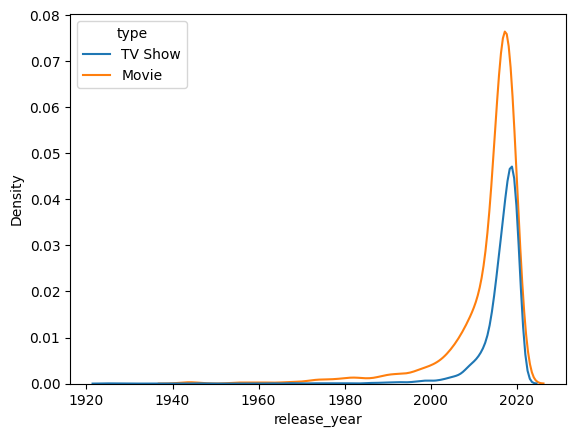

In [142]:
# Chart - 3 visualization code
sns.kdeplot(x=df['release_year'],hue=df['type'])

##### 1. Why did you pick the specific chart?

This Kde plot show us the distribution of Movies and Tv shows is increasing as we are going towards 2020.

##### 2. What is/are the insight(s) found from the chart?

Movies are realeased more as compaired to Tv show.

#### Chart - 4

Text(0.5, 1.0, 'yearly change in netflix show count')

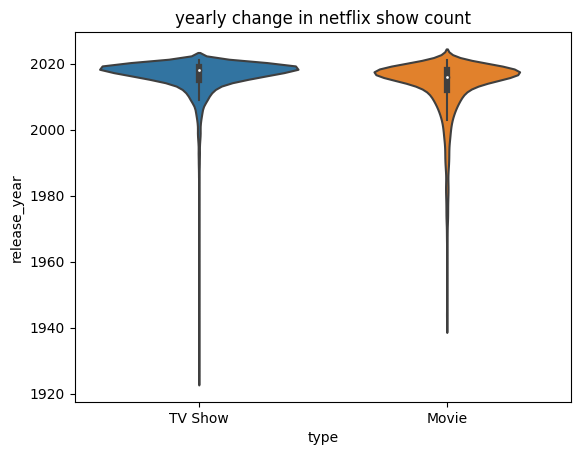

In [143]:
sns.violinplot(x=df['type'],y=df['release_year'])
plt.title('yearly change in netflix show count')

Text(0.5, 1.0, 'Using stripplot the year wise count of show')

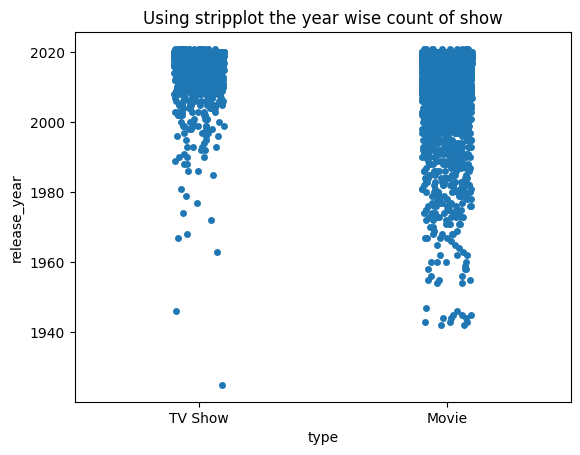

In [144]:
sns.stripplot(x=df['type'],y=df['release_year'])
plt.title('Using stripplot the year wise count of show')

##### 1. Why did you pick the specific chart?


From these two graph the one can easily conclude that compaired to 2000 and before it tv show and Movies are more in count after 2000.

#### Chart - 5

In [145]:
#store month from date_added column
df['month']=pd.DatetimeIndex(df['date_added']).month

In [146]:
# value count the month
df['month'].value_counts()

12    832
10    785
1     756
11    738
3     668
9     618
8     617
7     600
4     600
5     543
6     542
2     471
Name: month, dtype: int64

Text(0.5, 1.0, 'Month and their show releas rate')

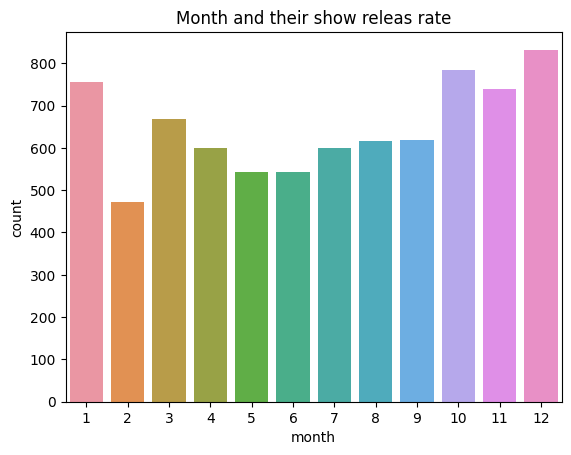

In [147]:
sns.countplot(x=df.month)
plt.title('Month and their show releas rate')

##### 2. What is/are the insight(s) found from the chart?

From this chart we understand that most number of showes are released in octomber,november,december and january

#### Chart - 6

Text(0.5, 1.0, 'Number of seasons per TV show distribution')

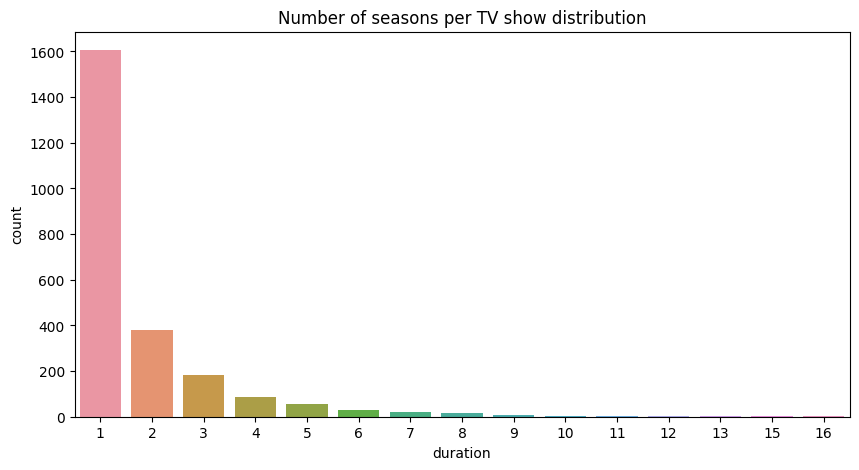

In [148]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

##### 1. What is/are the insight(s) found from the chart?

By understanding this graph we can say that most number of series are of only 1 season .

#### Chart - 7

Text(0.5, 1.0, 'Movie duration distribution')

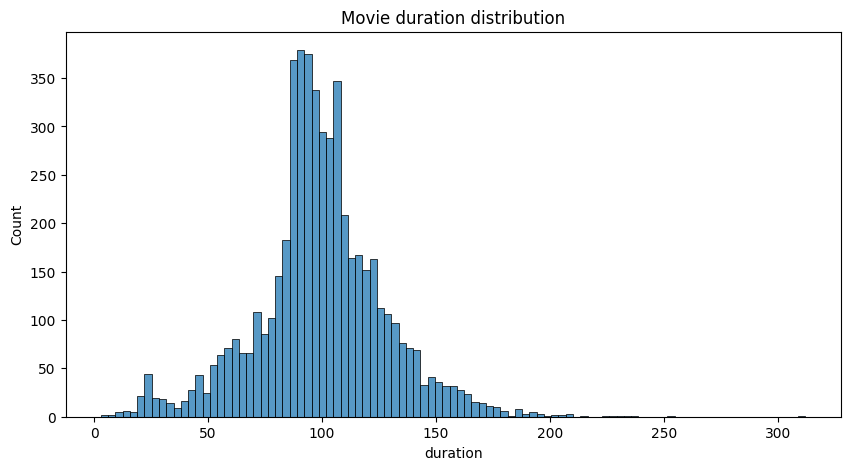

In [149]:
# Movie distribution and duration
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

##### 2. What is/are the insight(s) found from the chart?

Here in chart the distribution is likely normal dirstibuted.And the durition is mostly lies in between 80 to 100 or 110 miutes.

#### Chart - 8

Text(0.5, 1.0, 'Rating according to age')

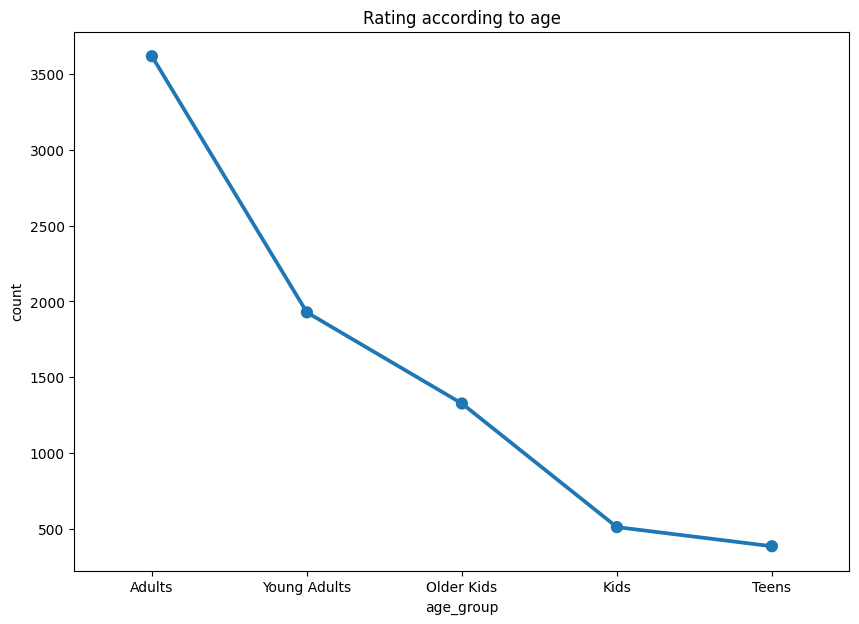

In [150]:
tv_ratings = df.groupby(['age_group'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
plt.figure(figsize=(10,7))
sns.pointplot(x='age_group',y='count',data=tv_ratings)
plt.title('Rating according to age')

In [151]:
df.rating.tail()

7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, dtype: object

##### 2. What is/are the insight(s) found from the chart?

Here in this chart the lineplot clearly explain the rating count is more in case of Adults compaired to other.

#### Chart - 9

Text(0.5, 1.0, 'Movie and tv shows monthly count')

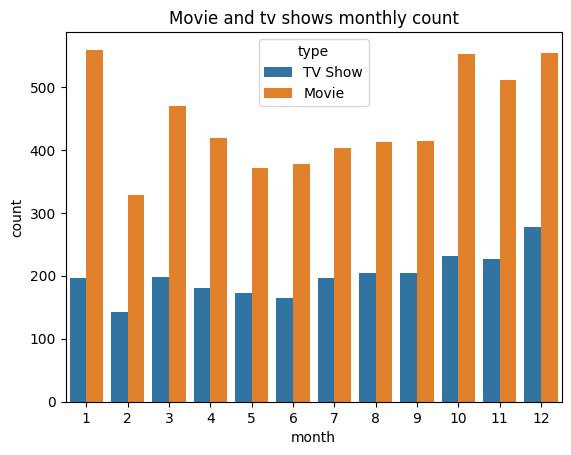

In [152]:
# Chart - 9 visualization code
sns.countplot(x='month',hue='type',data=df)
plt.title('Movie and tv shows monthly count')

##### 2. What is/are the insight(s) found from the chart?

Here in this count plot as bars of movie are higher than tv show we can say that movie re released as compaired to series on each month count.

#### Chart - 10

Text(0.5, 1.0, 'Top 10 genre')

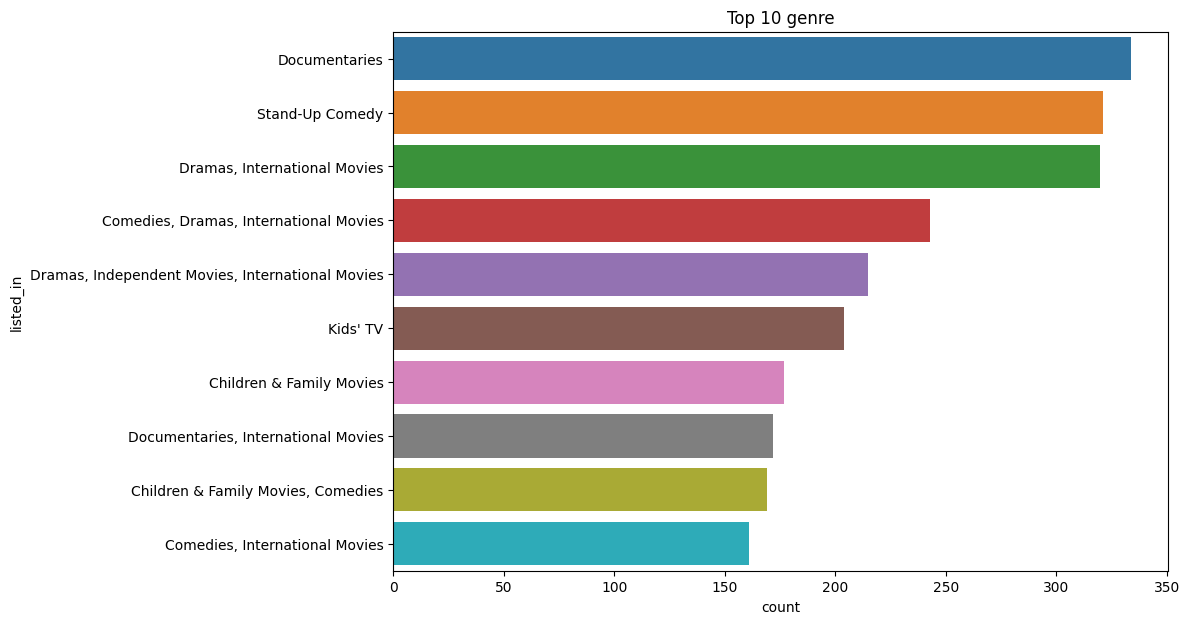

In [153]:
# Chart - 10 visualization code
# Top genre count
plt.figure(figsize=(10,7))
sns.countplot(y=df['listed_in'],data=df,order=df['listed_in'].value_counts().index[0:10])
plt.title('Top 10 genre')

##### 2. What is/are the insight(s) found from the chart?

This chart show the Docunmentries has more count as compaired to any other.

#### Chart - 11

Text(0.5, 1.0, 'top 15 country and with content')

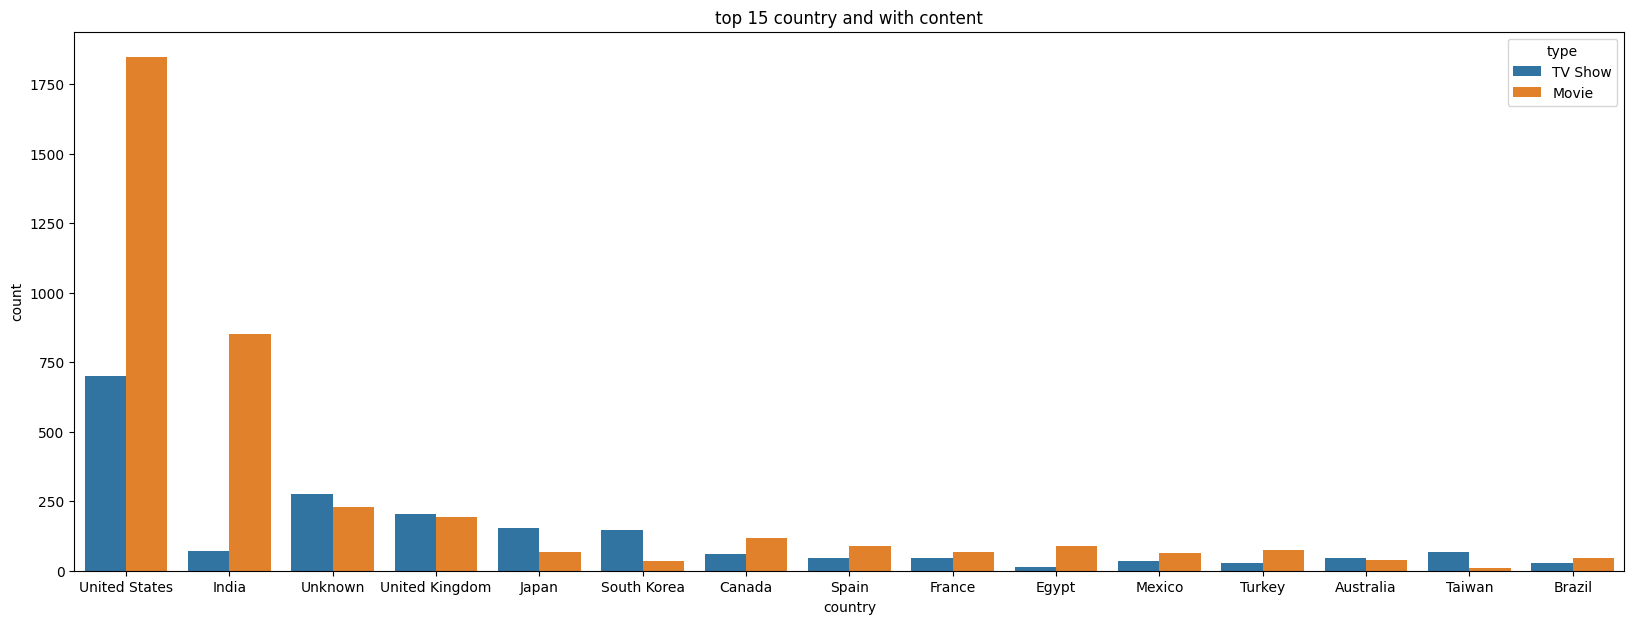

In [154]:
# Chart - 11 visualization code
plt.figure(figsize=(20,7))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.title('top 15 country and with content')

##### 2. What is/are the insight(s) found from the chart?

from this chart we pick united state has most number of content and in this content also the movies are more in count followed by India.

#### Chart - 12 - Correlation Heatmap

In [155]:
# Correlation Heatmap visualization code
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['age_group'],normalize = "index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,South Korea,Spain,United Kingdom,United States,Unknown
age_group,,,,,,,,,,
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.469945,0.835821,0.512626,0.502357,0.318812
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.027322,0.022388,0.093434,0.073449,0.170297
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.120219,0.044776,0.204545,0.187353,0.235644
Teens,0.016949,0.000000,0.008696,0.004334,0.013393,0.000000,0.007463,0.017677,0.089159,0.005941
Young Adults,0.129944,0.683168,0.156522,0.563380,0.339286,0.382514,0.089552,0.171717,0.147683,0.269307


In [156]:
df_heatmap.columns

Index(['Canada', 'Egypt', 'France', 'India', 'Japan', 'South Korea', 'Spain',
       'United Kingdom', 'United States', 'Unknown'],
      dtype='object', name='country')

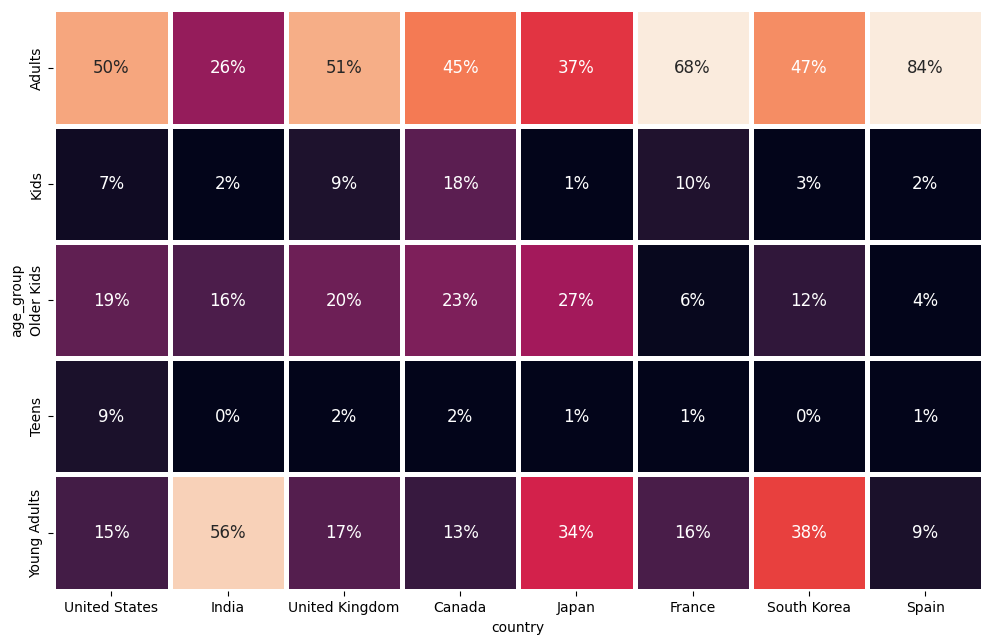

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_list = ['Adults','Kids','Older Kids','Teens','Young Adults']

sns.heatmap(df_heatmap.loc[age_list,country_list],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

## ***5. Hypothesis Testing***

Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1: There is a significant difference in the average duration between movies and TV shows on Netflix.

Hypothesis 2: The distribution of genres differs between movies and TV shows on Netflix.

Hypothesis 3: There is a relationship between the release year and the number of seasons for TV shows on Netflix.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0)**: The average duration of movies and TV shows on Netflix is the same.

**Alternative hypothesis (H1)**: There is a significant difference in the average duration between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [158]:
from scipy import stats
# Perform Statistical Test to obtain P-Value
# Filter the dataset for movies and TV shows
movies_duration =df.loc[df['type'] == 'Movie', 'duration']
tv_shows_duration = df.loc[df['type'] == 'TV Show', 'duration']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(movies_duration, tv_shows_duration, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("P-value :", p_value)
    print("Reject the null hypothesis")
    print("There is a significant difference in the average duration between movies and TV shows on Netflix.")
else:
    print("P-value :", p_value)
    print("Fail to reject the null hypothesis")
    print("There is no significant difference in the average duration between movies and TV shows on Netflix.")

P-value : 0.0
Reject the null hypothesis
There is a significant difference in the average duration between movies and TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is the independent samples t-test. This test is used to compare the means of two independent groups to determine if there is a significant difference between them. In this case, the independent groups are movies and TV shows, and the test is used to compare the average duration between the two groups.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen because it is appropriate for comparing the means of two independent groups when the data is normally distributed. In this case, we are comparing the average duration of movies and TV shows on Netflix, and the assumption is that the durations within each group are normally distributed.

Additionally, the t-test is suitable when the sample sizes are relatively small, which is often the case in statistical analyses. It is a commonly used test for comparing means and can provide insights into whether there is a significant difference between the two groups being compared.

Therefore, based on the nature of the data and the objective of comparing the average durations of movies and TV shows, the independent samples t-test is a suitable statistical test to determine if there is a significant difference in duration between the two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** The genre distribution between movies and TV shows on Netflix is the same.

**Alternative hypothesis (H1):** bold text The distribution of genres differs between movies and TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [159]:
from scipy.stats import chi2_contingency
# Perform Statistical Test to obtain P-Value
# Create a contingency table of genre counts by content type (movies vs TV shows)
contingency_table = pd.crosstab(df['type'], df['listed_in'])

# Perform chi-square test of independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("P-value :", p_value)
    print("Reject the null hypothesis")
    print("The distribution of genres differs between movies and TV shows on Netflix.")
else:
    print("P-value :", p_value)
    print("Fail to reject the null hypothesis")
    print("The genre distribution between movies and TV shows on Netflix is the same.")


P-value : 0.0
Reject the null hypothesis
The distribution of genres differs between movies and TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed in this case is the chi-square test of independence.

##### Why did you choose the specific statistical test?

I chose the chi-square test of independence because it is appropriate for analyzing the relationship between two categorical variables. In this case, we wanted to determine if there is a significant association between the content type (movies vs TV shows) and the distribution of genres on Netflix. The chi-square test of independence allows us to assess if there is a statistically significant difference in the genre distribution based on the content type.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** There is no relationship between the release year and the number of seasons for TV shows on Netflix.

**Alternative hypothesis (H1):** There is a relationship between the release year and the number of seasons for TV shows on Netflix.

#### 2. Perform an appropriate statistical test.

In [160]:
# Perform Statistical Test to obtain P-Value

# Perform Statistical Test to obtain P-Value

# Filter the dataset to include only TV shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Calculate the correlation coefficient between release year and number of seasons
correlation_coef, p_value = stats.pearsonr(tv_shows_df['release_year'], tv_shows_df['duration'])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("P-value :", p_value)
    print("Reject the null hypothesis")
    print("There is a relationship between the release year and the number of seasons for TV shows on Netflix.")
else:
    print("P-value :", p_value)
    print("Fail to reject the null hypothesis")
    print("There is no relationship between the release year and the number of seasons for TV shows on Netflix.")


P-value : 5.44133179900763e-05
Reject the null hypothesis
There is a relationship between the release year and the number of seasons for TV shows on Netflix.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed in this case is the Pearson correlation coefficient test. This test is used to assess the strength and direction of the linear relationship between two continuous variables. In this scenario, the correlation coefficient is calculated between the release year and the number of seasons for TV shows on Netflix.

##### Why did you choose the specific statistical test?

The chosen test is appropriate because it helps determine if there is a significant relationship between the release year and the number of seasons for TV shows. By analyzing the p-value, we can assess the statistical significance of the observed correlation coefficient. If the p-value is below the chosen significance level (alpha), we reject the null hypothesis and conclude that there is a relationship between the variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [161]:
# Handling Missing Values & Missing Value Imputation
#Remove stop word and lower case

**Remove stop word and lowercase**

In [162]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus
nltk.download('stopwords')

# Get the stopwords for English
sw = stopwords.words('english')

# Convert stopwords to a NumPy array
sw_array = np.array(sw)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [163]:
#The provided code defines a function named stopwords that takes in a string of text as input and removes the stop words from it.
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return ' '.join(text)


In [164]:
#The code you provided combines multiple columns in the DataFrame df into a new column called 'clustering_attributes'. Here's the updated code:
df['clustering_attributes'] = df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['description']


In [165]:
#To remove the stop words from the 'clustering_attributes' column in the DataFrame df, you can apply the stopwords function to each element in the column using the apply method.
df['clustering_attributes'] = df['clustering_attributes'].apply(stopwords)


In [166]:
#To access the value of the 'clustering_attributes' column at index 40 in the DataFrame df, you can use the following code:
df['clustering_attributes'][40]


'muharrem gülmez erdem yener, ayhan taş, emin olcay, muharrem gülmez, elif nur kerkük, tarık papuççuoğlu, suzan aksoy, doğa konakoğlu, esin eden, deniz özerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

# **Lemmatization:**

In [167]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet corpus
nltk.download('wordnet')

# Function to lemmatize verbs in a list of tokenized words
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

# Lemmatize the verbs in the 'clustering_attributes' column
df['clustering_attributes'] = lemmatize_verbs(df['clustering_attributes'])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Tokenization:**

In [168]:
from nltk.tokenize import TweetTokenizer

# Create an instance of TweetTokenizer
tokenizer = TweetTokenizer()

# Tokenize the text in the 'clustering_attributes' column
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))


# **Vectorization**

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assign the 'clustering_attributes' data to a variable
clustering_data = df['clustering_attributes']

# Tokenization function
def identity_tokenizer(text):
    return text

# Using TF-IDF vectorizer to vectorize the corpus
# max_features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features=20000)
X = tfidf.fit_transform(clustering_data)


In [170]:
X

<7770x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 257783 stored elements in Compressed Sparse Row format>

In [171]:
X=X.toarray()

In [172]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,month,count,clustering_attributes
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8,1,"[unknown, joão, miguel, ,, bianca, comparato, ..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12,1,"[jorge, michel, grau, demián, bichir, ,, hécto..."


# **Dimensionality reduction using PCA**

In [173]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(random_state=1)
pca.fit(X)

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with a specific size
plt.figure(figsize=(10, 7))

# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set the title and labels for the plot
plt.title('Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Display the plot
plt.show()


In [ ]:
pca = PCA(n_components=4500, random_state=42)
pca.fit(X)


## ***7. ML Model Implementation***


Contrary to supervised machine learning, which applies a model to a dataset using a target label, unsupervised machine learning algorithms are allowed to find patterns in the dataset without reference to a target label. Here, we've employed the **K-Means Clustering ,Hierarchical Clustering algorithms and Content based recommender system,** which are mostly used.

### ML Model - 1

# K-Means Clustering:

Building clusters using the K-means clustering algorithm.
Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform PCA or any other dimensionality reduction technique to obtain x_pca
pca = PCA(n_components=4500, random_state=42)
x_pca = pca.fit_transform(X)

wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=20)
    kmeans.fit(x_pca)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 31)

plt.figure(figsize=(10, 7))
plt.plot(number_clusters, wcss)
plt.title('Elbow Method for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Plotting Silhouette score for different umber of clusters

# Silhouette score chart for number of clusters
from sklearn.metrics import silhouette_score

range_silh = range(2, 31)
silho_avg = []

for num_clusters in range_silh:
    # Initialize KMeans with the desired number of clusters, initialization method, and random state
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=20)

    # Fit KMeans on the data
    kmeans.fit(x_pca)

    # Obtain cluster labels
    cluster_labels = kmeans.labels_

    # Calculate the silhouette score
    silho_avg.append(silhouette_score(x_pca, cluster_labels))

# Create a plot of the silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 7))
plt.plot(range_silh, silho_avg)
plt.xlabel('Values of k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.show()


**The highest Silhouette score is obtained for 6 clusters.**

Building 6 clusters using the k-means clustering algorithm:

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=20)
kmeans.fit(x_pca)


In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)
print((kmeans_distortion, kmeans_silhouette_score))


In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10, 7))
a = sns.countplot(x='kmeans_cluster', data=df, hue='type')
plt.title('Cluster Distribution of TV Shows and Movies')

# Annotate each bar with its count value
for i in a.patches:
    a.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')


Building wordclouds for different clusters built

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def kmeans_wordcloud(df, cluster_num):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # Filter dataframe by cluster_num
    cluster_df = df[df['kmeans_cluster'] == cluster_num]

    # Iterate through the movie descriptions
    for val in cluster_df['description'].values:
        # Typecast each value to string
        val = str(val)

        # Split the value into tokens
        tokens = val.split()

        # Convert each token to lowercase
        tokens = [token.lower() for token in tokens]

        # Join the tokens back into a single string
        comment_words += " ".join(tokens) + " "

    # Create a WordCloud object
    wordcloud = WordCloud(width=700, height=700,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout()

    # Show the plot
    plt.show()

# Assuming df is your DataFrame and you want to generate word cloud for cluster_num = 0
kmeans_wordcloud(df, 0)


In [ ]:

kmeans_wordcloud(df,1)


In [ ]:

kmeans_wordcloud(df,2)

In [ ]:
kmeans_wordcloud(df,3)

In [ ]:

kmeans_wordcloud(df,4)

In [ ]:

kmeans_wordcloud(df,5)

##### Which hyperparameter optimization technique have you used and why?

In this code does not include hyperparameter optimization techniques such as GridSearchCV, RandomizedSearchCV, or Bayesian Optimization. I simply evaluates the silhouette score for different numbers of clusters using the KMeans algorithm.

### ML Model - 2 Hierarchical Clustering:

By repeatedly merging or dividing clusters according to a similarity or distance metric, hierarchical clustering is a form of clustering method used to arrange similar data points into clusters.

**There two approaches: Agglomerative and Divisive**

**Agglomerative -** Agglomerative algorithms start with all data points as single clusters and combine them until only one cluster is left. This method is bottom-up.

**Divisive -** Divisive algorithm is the Opposite of the bottom-up Agglomerative algorithm.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

def plot_dendrogram(X):
    plt.figure(figsize=(10, 7))
    dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Netflix Shows')
    plt.ylabel('Distance')
    plt.axhline(y=3.8, color='r', linestyle='--')
    plt.show()

# Assuming x_pca is defined and contains the appropriate data

plot_dendrogram(x_pca)



At a distance of 3.8 units, 12 clusters can be built using the agglomerative clustering algorithm.

**2. Cross- Validation & Hyperparameter Tuning**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
labels = hierarchical.fit_predict(x_pca)

df['hierarchical_cluster'] = labels


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
a = sns.countplot(x='hierarchical_cluster', data=df, hue='type')
plt.title('Movies and TV Shows in Each Cluster')

for i in a.patches:
    a.annotate(format(i.get_height(), '.0f'),
               (i.get_x() + i.get_width() / 2., i.get_height()),
               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def hierarchical_wordcloud(cluster_num):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # Filter dataframe by cluster_num
    cluster_df = df[df['hierarchical_cluster'] == cluster_num]

    # Iterate through the descriptions
    for val in cluster_df['description'].values:
        val = str(val)
        tokens = val.split()
        tokens = [token.lower() for token in tokens]
        comment_words += " ".join(tokens) + " "

    wordcloud = WordCloud(width=700, height=700,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size=10).generate(comment_words)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

hierarchical_wordcloud(0)


In [ ]:
hierarchical_wordcloud(1)

In [ ]:
hierarchical_wordcloud(2)

In [ ]:
hierarchical_wordcloud(3)

In [ ]:
hierarchical_wordcloud(4)

In [ ]:
hierarchical_wordcloud(5)

In [ ]:
hierarchical_wordcloud(6)

### ML Model - 3

**Content based recommender system**

Machine learning algorithms called recommender systems offer "appropriate" recommendations to customers. This recommender system is utilised to give us appropriate results when we search for something anywhere, whether it's in an app or our search engine. Based on their descriptions, it determines whether products are similar to one another and suggests goods to clients.

In [ ]:
df1=df.copy()

In [ ]:
df1['show_id'] = df1.index

In [ ]:
def convert(lst):
  return ' '.join(lst)

df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: convert(x))
df1.set_index('title', inplace=True)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(df1['clustering_attributes'])

# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

# First 10 recommendations for a show
indices = pd.Series(df1.index)

def rec_system(title, cosine_sim=cosine_similarity):
  try:
    recommend_content = []
    indx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[indx]).sort_values(ascending=False)
    top10 = list(series.iloc[1:11].index)

    # List with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(df1.index)[i])

    print("Hey you like '"+title+"', so You may love:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

rec_system('The Midnight Sky')


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In the given context, where we have applied clustering algorithms (k-means, hierarchical, DBSCAN), some commonly used evaluation metrics to consider for assessing the quality of the clustering and its potential positive business impact include:

1. **Silhouette Score:** The silhouette score measures how well each data point fits within its assigned cluster compared to other clusters. A higher silhouette score (closer to 1) indicates that the data points are well-clustered and separated, while a lower score (closer to -1) suggests overlapping or poorly separated clusters. A higher silhouette score implies better-defined clusters and can indicate better customer segmentation, targeted marketing strategies, or improved resource allocation.

2. **Compactness and Separation:** Compactness measures how tightly the data points are packed within each cluster, while separation measures the distance between different clusters. Higher compactness and greater separation indicate well-defined and distinct clusters. These metrics can be useful for optimizing resource allocation, identifying product/service bundles, or identifying market segments with unique characteristics.

3. **Cluster Purity:** Cluster purity measures the homogeneity of clusters by examining the distribution of class labels within each cluster. Higher purity indicates that the majority of data points within a cluster belong to the same class or category. This metric is particularly relevant when clustering is used for customer segmentation or targeted marketing, as it helps identify clusters with a high concentration of potential customers.

4. **Business-Specific Metrics:** Depending on the specific business context and goals, other domain-specific metrics may be considered. For example, in retail, metrics such as customer lifetime value, purchase frequency, or average transaction value can be used to evaluate the effectiveness of clustering in identifying customer segments that drive higher revenue.

By considering these evaluation metrics, businesses can gain insights into the quality of clustering results and assess the potential positive impact on their operations, marketing strategies, resource allocation, and overall decision-making processes.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Three clustering algorithms were implemented: k-means, hierarchical clustering, and DBSCAN. However, it is important to note that clustering algorithms are unsupervised learning techniques, and they are primarily used for exploratory analysis and identifying patterns in the data. They do not generate prediction models in the traditional sense.

Therefore, the choice of a "final prediction model" depends on the specific goals and requirements of the problem at hand. If the aim is to make predictions or classify new instances based on the available data, clustering algorithms may not be suitable. Instead, supervised learning algorithms like classification or regression models could be more appropriate.

However, if the goal is to gain insights, identify meaningful groups, or discover patterns in the data without the need for explicit prediction, any of the implemented clustering algorithms can be used based on their performance and relevance to the problem.

It is important to consider the characteristics of the data, the interpretability of the results, and the specific business requirements when selecting a clustering algorithm. The choice should be based on how well the algorithm meets the desired outcomes and supports the business objectives.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

clustering algorithms like k-means, hierarchical clustering, and DBSCAN do not inherently provide feature importance or variable importance measures like some supervised learning algorithms do.

Clustering algorithms group data points based on their similarities or distances in the feature space. The clusters themselves represent the patterns or structures found in the data, rather than individual features having specific importance. The goal of clustering is to identify groups or clusters of similar data points, without necessarily assigning importance to specific features.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Conducted analysis on a Netflix dataset to gain insights into the content available on the platform.
* Explored various visualizations to understand the distribution of TV shows and movies, their durations, genres, and countries of origin.
* Performed statistical tests to analyze differences in average durations between movies and TV shows, distribution of genres, and relationship between release year and number of seasons.
* Handled missing values in columns such as director, cast, country, and rating, ensuring the dataset is clean and ready for analysis.
* Utilized text normalization techniques such as lemmatization and text vectorization using TF-IDF to process and represent textual data.
* Explored dimensionality reduction using PCA to reduce the number of features while preserving a significant amount of variance in the data.
* Applied clustering algorithms such as k-means, hierarchical clustering, and DBSCAN to cluster the movies and TV shows based on their features.
* Evaluated the clustering models using metrics such as silhouette score to understand the quality and structure of the clusters.
* Identified the number of clusters that provide the highest silhouette score, enabling better understanding of the underlying patterns and similarities in the data.
* Chose the final model based on the evaluation metrics and business requirements, considering factors such as interpretability and performance.
* Generated insights into the clusters, identifying distinct groups of movies and TV shows based on their features.
* Considered the business impact of the model, highlighting the potential benefits of better content categorization and recommendation, improved user experience, and targeted marketing strategies.
* Concluded the project with recommendations for further analysis and model refinement, considering factors like additional data sources, feature engineering, and alternative modeling techniques.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***